                  Detecting Malaria cells using Convolutional Neural Network

# Importing Libraries

In [1]:
import  os
from keras.preprocessing.image import ImageDataGenerator, array_to_img,img_to_array,load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import cvutils
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
import keras
from keras.utils import plot_model
from keras.layers import BatchNormalization
from pathlib import Path
from keras.preprocessing import image
from keras.models import model_from_json

Using TensorFlow backend.


# Loading Image Dataset

In [2]:
data    = []
labels  = []
Parasitized  = os.listdir("cell_images/Parasitized/")
Uninfected   = os.listdir("cell_images/Uninfected/")

In [3]:
for i in Parasitized:
    if i != "Thumbs.db":
        image = cv2.imread("cell_images/Parasitized/" + i)
        size_image = cv2.resize(image, (50, 50))
        data.append(np.array(size_image))
        labels.append(1)
for j in Uninfected:
    if j != "Thumbs.db":
        image = cv2.imread("cell_images/Uninfected/" + j)
        size_image = cv2.resize(image, (50, 50))
        data.append(np.array(size_image))
        labels.append(0)
    

In [4]:
print(len(data))
print(len(labels))

27558
27558


# Sample Data visualization

In [5]:
cells = np.array(data)
labels = np.array(labels)

np.save('Cells' , cells)
np.save('Labels' , labels)

idx = np.arange(cells.shape[0])
np.random.shuffle(idx)
cells = cells[idx]
labels = labels[idx]

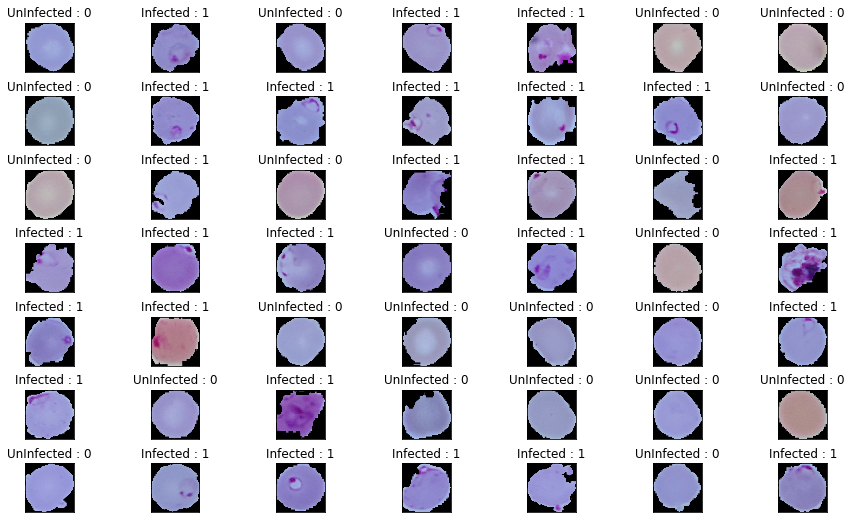

In [6]:
plt.figure(1 , figsize = (15 , 9))
n = 0 
for i in range(49):
    n += 1 
    r = np.random.randint(0 , cells.shape[0] , 1)
    plt.subplot(7 , 7 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    plt.imshow(cells[r[0]])
    plt.title('{} : {}'.format('Infected' if labels[r[0]] == 1 else 'UnInfected' ,
                               labels[r[0]]) )
    plt.xticks([]) , plt.yticks([])
    
plt.show()

# Normalize data set

In [7]:
x_train, x_test, y_train, y_test = train_test_split(cells, labels, test_size = 0.2, random_state = 101)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/255
x_test/255


    

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 

In [8]:
# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train,2)
y_test  = keras.utils.to_categorical(y_test,2)

# Create a model and add layers

In [9]:

model = Sequential()

In [10]:
model.add(Conv2D(32,kernel_size = (3,3),padding = 'same',input_shape = (50,50,3),activation = "relu"))
#model.add(Conv2D(32,kernel_size = (3,3),activation = "relu")) #k
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.25))  # activated now


model.add(Conv2D(64,kernel_size = (3,3),padding = 'same',activation = "relu"))
#model.add(Conv2D(64,kernel_size = (3,3),activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.25)) 


model.add(Conv2D(64,kernel_size = (3,3),padding = 'same',activation = "relu"))
#model.add(Conv2D(64,kernel_size = (3,3),activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(110, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(2,activation = "softmax"))


# Print a summary of the model
model.summary()


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 50, 50, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 25, 25, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxP

# Compile the model

In [11]:
model.compile(
                loss= 'categorical_crossentropy',
                optimizer= "adam",
                metrics= ['accuracy']
             )

# Train the model

In [12]:
hist = model.fit(
            x_train,
            y_train,
            batch_size= 50,
            epochs= 10,
            validation_data= (x_test,y_test),
            shuffle= True
         )

Instructions for updating:
Use tf.cast instead.
Train on 22046 samples, validate on 5512 samples
Epoch 1/10
22046/22046 [==============================] - 102s 5ms/step - loss: 0.5027 - acc: 0.7557 - val_loss: 0.2742 - val_acc: 0.9028
Epoch 2/10
22046/22046 [==============================] - 102s 5ms/step - loss: 0.2052 - acc: 0.9337 - val_loss: 0.2102 - val_acc: 0.9180
Epoch 3/10
22046/22046 [==============================] - 104s 5ms/step - loss: 0.1678 - acc: 0.9471 - val_loss: 0.1815 - val_acc: 0.9414
Epoch 4/10
22046/22046 [==============================] - 101s 5ms/step - loss: 0.1543 - acc: 0.9514 - val_loss: 0.1407 - val_acc: 0.9517
Epoch 5/10
22046/22046 [==============================] - 377s 17ms/step - loss: 0.1475 - acc: 0.9531 - val_loss: 0.1307 - val_acc: 0.9566
Epoch 6/10
22046/22046 [==============================] - 93s 4ms/step - loss: 0.1362 - acc: 0.9552 - val_loss: 0.1381 - val_acc: 0.9559
Epoch 7/10
22046/22046 [==============================] - 102s 5ms/step - l

In [13]:
import pandas as pd
acc = pd.DataFrame.from_dict(hist.history)
acc = pd.concat([pd.Series(range(0,30),name='epochs'),acc],axis=1)
acc.head()

,epochs,val_loss,val_acc,loss,acc
0,0,0.274220,0.902758,0.502682,0.755738
1,1,0.210229,0.917997,0.205213,0.933684
2,2,0.181476,0.941401,0.167797,0.947065
3,3,0.140682,0.951742,0.154271,0.951420
4,4,0.130721,0.956640,0.147499,0.953098


# Plot Model Accuracy

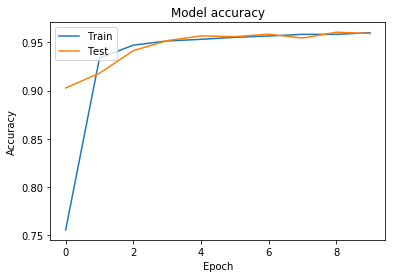

In [14]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Save neural network structure

In [15]:
model_Struct = model.to_json()
file_name = Path("model_structure.json")
file_name.write_text(model_Struct)

5632

# Save neural network's trained weights

In [16]:
model.save_weights("model_weights.h5")

# Predictions

In [17]:
model.predict(x_test)

array([[6.4721263e-07, 9.9999940e-01],
       [9.9456596e-01, 5.4339790e-03],
       [2.5192510e-05, 9.9997485e-01],
       ...,
       [9.8881322e-01, 1.1186767e-02],
       [3.7102462e-04, 9.9962890e-01],
       [4.9405829e-10, 1.0000000e+00]], dtype=float32)

# Validating Model prediction

* Validating the model by passing single image

In [19]:
class_labels = ["Uninfected","Infected"]
from keras.preprocessing import image
img = image.load_img("cell_images/Parasitized/C37BP2_thinF_IMG_20150620_131423a_cell_92.png", target_size=(50, 50))
#img = image.load_img("cell_images/Uninfected/C1_thinF_IMG_20150604_104722_cell_123.png", target_size=(50, 50))
image_to_test = image.img_to_array(img)
list_of_images = np.expand_dims(image_to_test, axis=0)
results = model.predict(list_of_images)
single_result = results[0]
most_likely_class_index = int(np.argmax(single_result))
class_likelihood = single_result[most_likely_class_index]
#print(most_likely_class_index)
class_label = class_labels[most_likely_class_index]
print("This is image is a {} - Likelihood: {:2f}".format(class_label, class_likelihood))
most_likely_class_index

This is image is a Infected - Likelihood: 0.999930


1

* Validating the model by loading model structure

In [20]:
class_labels = ["Uninfected","Infected"]

# Load the json file that contains the model's structure
f = Path("model_Structure.json")
model_Structure = f.read_text()

# Recreate the Keras model object from the json data
model = model_from_json(model_Structure)

# Re-load the model's trained weights
model.load_weights("model_weights.h5")

# Load an image file to test, resizing it to 32x32 pixels (as required by this model)
#img = image.load_img("cell_images/Parasitized/C37BP2_thinF_IMG_20150620_131423a_cell_92.png", target_size = (50,50))
img = image.load_img("cell_images/Uninfected/C1_thinF_IMG_20150604_104722_cell_123.png", target_size = (50,50))
# Convert the image to a numpy array
img_to_test = image.img_to_array(img)

# Add a fourth dimension to the image (since Keras expects a list of images, not a single image)
list_of_images = np.expand_dims(img_to_test,axis= 0)

# Make a prediction using the model
results = model.predict(list_of_images)

# Since we are only testing one image, we only need to check the first result
single_result = results[0]
# We will get a likelihood score for all 10 possible classes. Find out which class had the highest score.
most_likely_class_indx = int(np.argmax(single_result))
class_likhood = single_result[most_likely_class_indx]


# Get the name of the most likely class
class_label = class_labels[most_likely_class_indx]

# Print the result

print("This is image is a {} - Likelihood: {:2f}".format(class_label, class_likhood))

This is image is a Uninfected - Likelihood: 0.921831
